In [1]:
import mne

import numpy as np
import matplotlib.pyplot as plt
from mne import Epochs, pick_types
from mne.decoding import CSP
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.covariance import LedoitWolf, OAS
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import json


In [2]:



# Replace 'your_file.gbf' with the path to your GBF file
# file_path = '../thesis_data/arne_03_05/Testdata_tt1.bdf'
# graph_file = "graph/arne_real_03_05_tt1_eeg.json"
# file_path = '../thesis_data/arne_03_05/Testdata_tt3.bdf'
# graph_file = "graph/arne_imag_03_05_tt3_eeg.json"
# file_path = '../thesis_data/ly_04_07/Testdata_ly_real_01.bdf'
# graph_file = "graph/ly_real_01_eeg.json"
# file_path = '../thesis_data/ly_04_07/Testdata_ly_real_02.bdf'
# graph_file = "graph/ly_real_02_eeg.json"
# file_path = '../thesis_data/ly_04_07/Testdata_ly_imag_01.bdf'
# graph_file = "graph/ly_imag_01_eeg.json"
# file_path = '../thesis_data/ly_04_07/Testdata_ly_imag_03.bdf'
# graph_file = "graph/ly_imag_03_eeg.json"
# file_path = '../thesis_data/ece_04_07/Testdata_ece_real_02.bdf'
# graph_file = "graph/ece_real_02_eeg.json"
# file_path = '../thesis_data/qiang_23_07/Testdata_real_01.bdf'
# graph_file = "graph/qiang_real_01_eeg.json"
file_path = '../thesis_data/qiang_23_07/Testdata_imag_01.bdf'
graph_file = "graph/qiang_imag_01_eeg.json"


# Load the BDF file
raw = mne.io.read_raw_bdf(file_path, preload=True)

# Print some information about the loaded data
print(raw.info)
# Print channel names
print(raw.ch_names)

# Specify the channel name you are interested in
channel_name = 'Status'  # Replace with the actual channel name

# Get the index of the specified channel
channel_index = raw.ch_names.index(channel_name)

# Get the data for the specified channel
channel_data = raw.get_data()[channel_index]

# Print unique values in the channel
unique_values = set(channel_data)
print("Unique values in channel '{}':".format(channel_name))
for value in unique_values:
    print("{}---{}".format(value,hex(int(value))))

# Specify the value you want to count
value_to_count = 128  # Replace with the value you want to count

# Count occurrences of the specified value using Python's count() function
count_python = channel_data.tolist().count(value_to_count)
print("Occurrences of value {} in channel '{}': {}".format(value_to_count, channel_name, count_python))
array_int = channel_data.astype(int)
channel_trigger = np.right_shift(array_int,5) & 0x7


Extracting EDF parameters from /Users/reniflalebenezer/thesis_data/qiang_23_07/Testdata_imag_01.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 796671  =      0.000 ...   389.000 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 271 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2024-07-23 16:16:41 UTC
 nchan: 272
 projs: []
 sfreq: 2048.0 Hz
 subject_info: 1 item (dict)
>
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3

In [3]:
# Specify the value you want to track changes for
value_to_track = 2  # Replace with the value you want to track changes for

# Initialize variables to keep track of changes
previous_value = channel_trigger[0]
change_instances = []

# Iterate through the data and track instances when the value changes
for i, value in enumerate(channel_trigger):
    if value != previous_value and value == value_to_track:
        change_instances.append((i, value))
    previous_value = value

# Print instances when the value changes
print("Instances when value {} changes in channel '{}': {} instances".format(value_to_track, channel_name, len(change_instances)))
for instance in change_instances:
    print("Index: {}, Value: {}".format(instance[0], instance[1]))

Instances when value 2 changes in channel 'Status': 80 instances
Index: 181908, Value: 2
Index: 186771, Value: 2
Index: 187480, Value: 2
Index: 189864, Value: 2
Index: 201152, Value: 2
Index: 203197, Value: 2
Index: 203785, Value: 2
Index: 207801, Value: 2
Index: 223371, Value: 2
Index: 223678, Value: 2
Index: 245012, Value: 2
Index: 261368, Value: 2
Index: 263819, Value: 2
Index: 284154, Value: 2
Index: 313474, Value: 2
Index: 319994, Value: 2
Index: 334156, Value: 2
Index: 335968, Value: 2
Index: 336567, Value: 2
Index: 339812, Value: 2
Index: 340127, Value: 2
Index: 359624, Value: 2
Index: 362908, Value: 2
Index: 364063, Value: 2
Index: 369833, Value: 2
Index: 375330, Value: 2
Index: 379302, Value: 2
Index: 389490, Value: 2
Index: 390261, Value: 2
Index: 396918, Value: 2
Index: 399566, Value: 2
Index: 413546, Value: 2
Index: 417040, Value: 2
Index: 417909, Value: 2
Index: 429137, Value: 2
Index: 458219, Value: 2
Index: 475611, Value: 2
Index: 477006, Value: 2
Index: 480125, Value: 2

In [4]:
# Define a list of channels you want to keep
channels_to_keep = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'A32', 'A31', 'A23','A8', 'A19', 'A1']

# Create a new raw object with only the specified channels
raw_specific_channels = raw.copy().pick(channels_to_keep)

# Define a mapping dictionary from original channel names to standard electrode names
channel_mapping = {
    'A32':'Cz', 
    'A31':'Fz', 
    'A23':'C4',
    'A8':'C3', 
    'A19':'P4', 
    'A1':'P3'
    # Add more mappings as needed
}

# Rename channels in your raw data using the mapping
raw_specific_channels.rename_channels(channel_mapping)





Measurement date,"July 23, 2024 16:16:41 GMT"
Experimenter,Unknown
Participant,qiang
Digitized points,Not available
Good channels,12 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,2048.00 Hz
Highpass,0.00 Hz
Lowpass,417.00 Hz


In [5]:

# Initialize variables to keep track of changes
previous_value = channel_trigger[0]
all_events = []

# Iterate through the data and track instances when the value changes
for i, value in enumerate(channel_trigger):
    if value != previous_value and value != 0:
        all_events.append([i,0, value])
    previous_value = value




print(all_events)


[[173680, 0, 1], [179667, 0, 4], [179959, 0, 5], [180103, 0, 4], [181446, 0, 5], [181908, 0, 2], [182064, 0, 3], [182215, 0, 4], [182656, 0, 5], [182657, 0, 4], [182963, 0, 5], [183120, 0, 4], [183435, 0, 5], [183732, 0, 4], [184032, 0, 5], [184342, 0, 4], [184649, 0, 5], [184805, 0, 4], [185105, 0, 5], [185261, 0, 4], [185717, 0, 5], [186771, 0, 2], [187196, 0, 3], [187480, 0, 2], [189713, 0, 3], [189864, 0, 2], [194219, 0, 6], [195251, 0, 7], [199560, 0, 1], [199591, 0, 5], [199879, 0, 4], [200421, 0, 5], [201152, 0, 2], [202285, 0, 3], [203197, 0, 2], [203336, 0, 3], [203785, 0, 2], [205592, 0, 3], [206170, 0, 4], [207338, 0, 5], [207801, 0, 2], [212042, 0, 6], [213073, 0, 7], [217552, 0, 1], [217587, 0, 5], [217719, 0, 4], [219966, 0, 5], [220286, 0, 4], [220561, 0, 5], [220562, 0, 4], [220824, 0, 5], [222203, 0, 4], [223064, 0, 5], [223371, 0, 2], [223517, 0, 3], [223678, 0, 2], [227950, 0, 6], [228979, 0, 7], [232685, 0, 1], [232720, 0, 5], [233013, 0, 4], [235122, 0, 5], [235974

In [6]:
#remove events less than 0.2 seconds from the events list
def conv_sample_to_time(sample_id):
    return sample_id/2048.0 
popped_box_events = []
cleaned_box_events = []
remove_train_events = []
ignore_events_threshold = 0.3

trial = 0;
previous_index_2 = 0
previous_index_4 = 0
for [i,x, value] in all_events:
    if value==1:
        cleaned_box_events.append([i,x, value])
        trial+=1
    elif value==7:
        cleaned_box_events.append([i,x, value])
    elif value==2:
        cleaned_box_events.append([i,x, value])
        previous_index_2 = i
    elif value==4:
        cleaned_box_events.append([i,x, value])
        previous_index_4 = i
    elif value==5:
        prev_time = conv_sample_to_time(previous_index)
        curr_time = conv_sample_to_time(i)
        time_diff = curr_time - prev_time
        if previous_value==4 and time_diff<ignore_events_threshold:
            temp = cleaned_box_events.pop()
            popped_box_events.append(temp)
        else:
            cleaned_box_events.append([i,x, value])
    elif value==3:
        prev_time = conv_sample_to_time(previous_index_2)
        curr_time = conv_sample_to_time(i)
        time_diff = curr_time - prev_time
        if previous_value==2 and time_diff<ignore_events_threshold:
            temp = cleaned_box_events.pop()
            popped_box_events.append(temp)
        else:
            cleaned_box_events.append([i,x, value])
    elif value==6:
        prev_time = conv_sample_to_time(previous_index_2)
        curr_time = conv_sample_to_time(i)
        time_diff = curr_time - prev_time
        if time_diff<ignore_events_threshold:
            temp = cleaned_box_events.pop()
            popped_box_events.append(temp)
        else:
            cleaned_box_events.append([i,x, value])
    previous_value = value
    previous_index = i
all_events = cleaned_box_events

Using matplotlib as 2D backend.


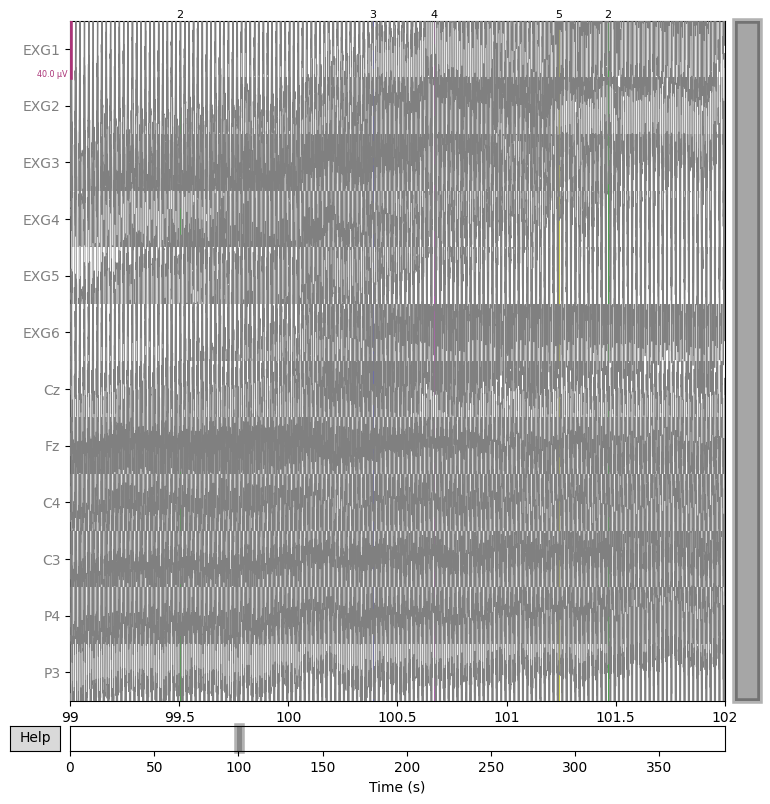

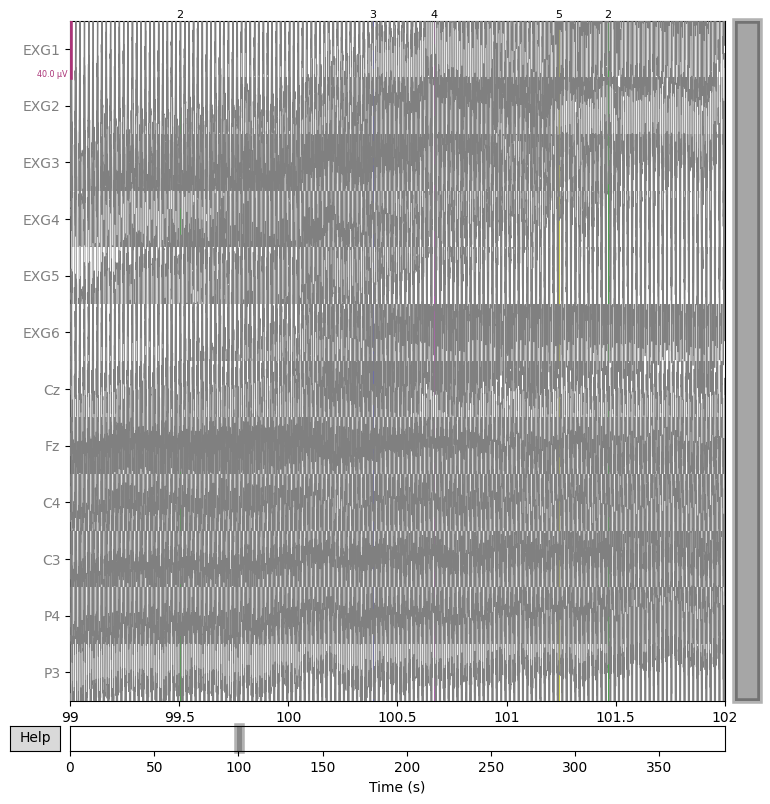

In [7]:
# Define event colors
event_color = {1: "r", 2: "g", 3: "b", 4: "m", 5: "y", 6: "k", 7: "c"}

# Plot the data with events
all_events_arr = np.asarray(all_events)
raw_specific_channels.plot(
        events=all_events_arr,
        start=99,  # Start time in seconds
        duration=3,  # Duration in seconds to be plotted
        color="gray",
        event_color=event_color,
    )


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


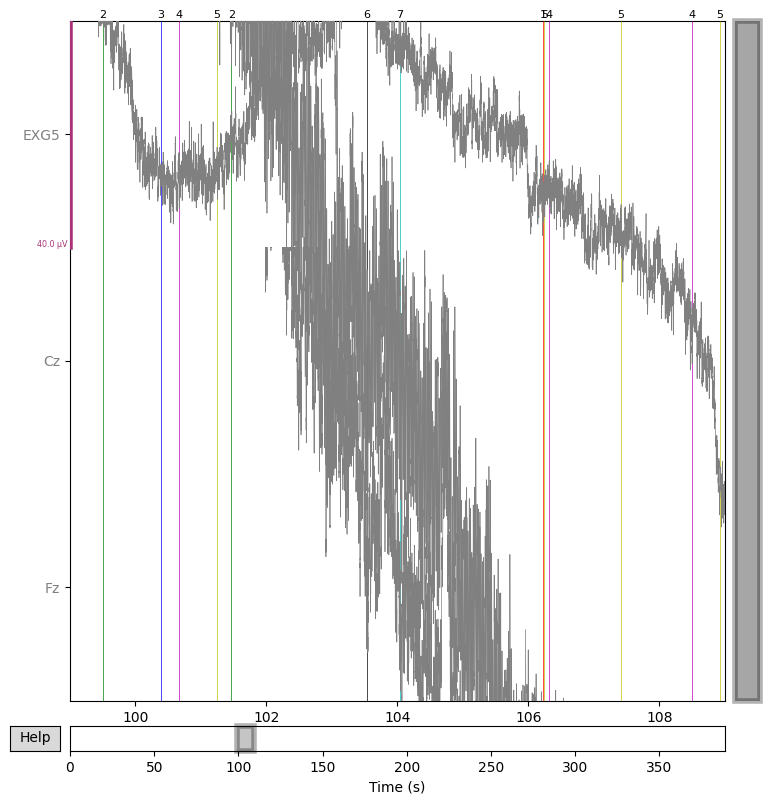

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3381 samples (1.651 s)



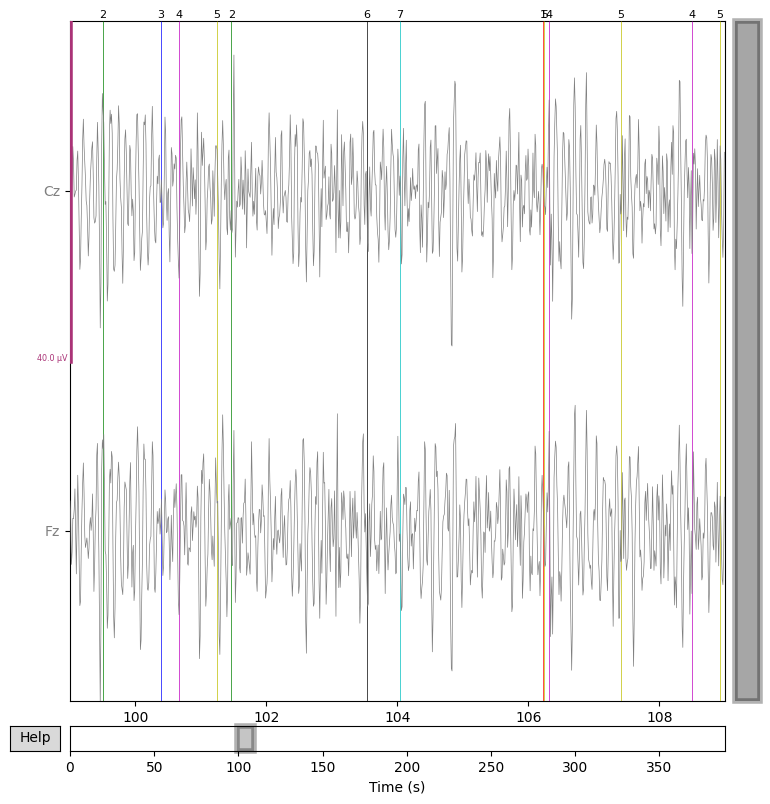

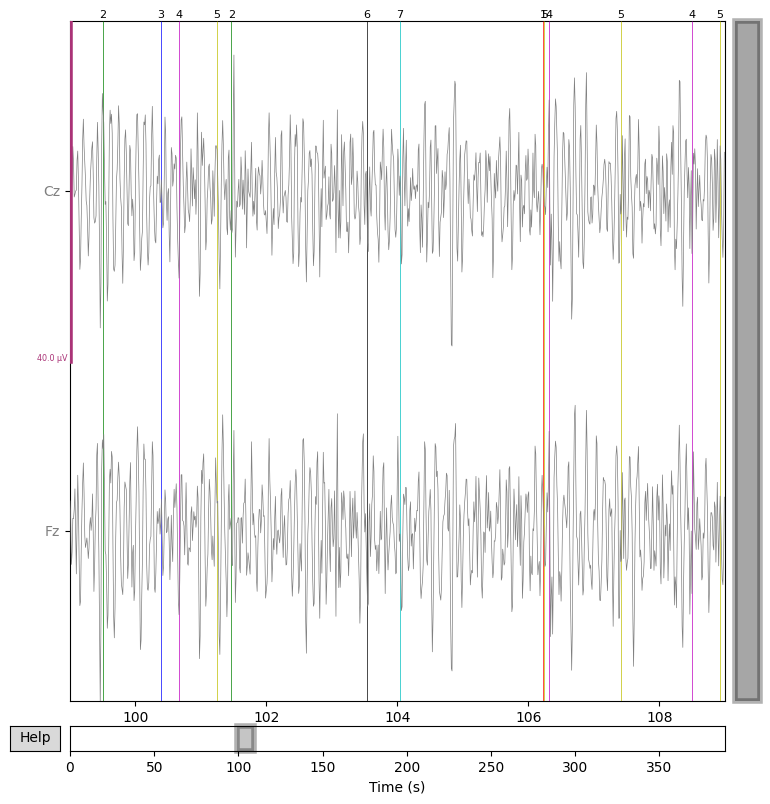

In [8]:
raw_specific_channels.set_eeg_reference(ref_channels=['EXG5','EXG6'])

raw_specific_channels.plot(
        events=all_events_arr,
        start=99,  # Start time in seconds
        duration=10,  # Duration in seconds to be plotted
        color="gray",
        event_color=event_color,
        picks=["Cz","Fz","EXG5"]
    )

raw_specific_channels.filter(7.0, 30.0, fir_design="firwin")
raw_specific_channels.plot(
        events=all_events_arr,
        start=99,  # Start time in seconds
        duration=10,  # Duration in seconds to be plotted
        color="gray",
        event_color=event_color,
        picks=["Cz","Fz"]
    )

In [9]:
raw_specific_channels.set_channel_types({'EXG1':'eog','EXG2':'eog','EXG3':'eog','EXG4':'eog'})

# Define a mapping dictionary from original channel names to standard electrode names
channel_mapping = {
    'EXG5':'A1', 
    'EXG6':'A2'
    # Add more mappings as needed
}

# Rename channels in your raw data using the mapping
raw_specific_channels.rename_channels(channel_mapping)

# Define event IDs for epochs of interest
event_id = {'event_1': 2, 'event_2': 4}  # Replace with your actual event IDs

# Define epoch parameters
tmin, tmax = -0.5, 0.2  # Start and end times in seconds

# Create epochs
epochs = mne.Epochs(raw_specific_channels, all_events, event_id, tmin, tmax, preload=True)

# Label epochs based on event ID
labels = epochs.events[:, -1]

Not setting metadata
118 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 118 events and 1435 original time points ...
0 bad epochs dropped


In [10]:
labels

array([4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4,
       4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2,
       2, 4, 2, 2, 4, 2, 4, 2])

In [11]:

total_4 = 0
total_2 = 0
for i in labels:
    if(i==2):
        total_2 = total_2+1
    if(i==4):
        total_4 = total_4+1

In [12]:

def split_epochs_stratified_kfold(epochs_data, n_splits=5, random_state=None):
    data = epochs_data
    labels = epochs.events[:, -1]
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    splits = []
    
    for train_index, test_index in skf.split(data, labels):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        splits.append((X_train, X_test, y_train, y_test))
    
    return splits

In [13]:


avg_true_pos = []
avg_false_pos = []
avg_true_neg = []
avg_false_neg = []
sum_true_pos = []
sum_true_neg = []
sum_false_pos = []
sum_false_neg = []
# # Select epochs and labels for the events of interest
epochs_data = epochs.get_data(copy=True)
print("length of epochs data")
print(len(epochs_data))
# Frequency bands
freq_bands = [(7, 13), (14, 30)]

# Apply band-pass filters to the raw data
filtered_epochs = []
for fmin, fmax in freq_bands:
    filtered = epochs.copy().filter(fmin, fmax, fir_design='firwin')
    filtered_epochs.append(filtered)

# Concatenate the filtered epochs
X = [e.get_data() for e in filtered_epochs]
X = np.concatenate(X, axis=1)  # Shape: (n_epochs, n_channels * n_bands, n_times)

# Flatten the time dimension
X = X.reshape(X.shape[0], X.shape[1], -1)
print("length of filtered epochs data")
print(len(X))


accuracies = []
true_pos = []
false_pos = []
true_neg = []
false_neg = []
splits = split_epochs_stratified_kfold(X, n_splits=5, random_state=42)
for X_train, X_test, y_train, y_test in splits:
    print(f"train_data_length = {len(X_train)}")
    print(f"test_data_length = {len(X_test)}")
    # Initialize CSP
    
    csp = CSP(n_components=4, reg='ledoit_wolf', log=True, norm_trace=False)

    # Create a classification pipeline with CSP and LDA
    clf = Pipeline([('CSP', csp), ('LDA', LDA())])

    # Train the classifier
    clf.fit(X_train, y_train)

    # Test the classifier
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(y_test)
    print(y_pred)
    tp=0
    tn=0
    fp=0 
    fn=0
    for yt,yp in zip(y_test,y_pred):
        if((yt==2)and(yp==2)):
            tp = tp+1
        elif((yt==2)and(yp==4)):
            fn = fn+1
        elif((yt==4)and(yp==4)):
            tn = tn+1
        elif((yt==4)and(yp==2)):
            fp = fp+1
    print(f"tp - {tp}")
    print(f"fn - {fn}")
    print(f"tn - {tn}")
    print(f"fp - {fp}")


    true_pos.append(tp) 
    false_pos.append(fp)  
    true_neg.append(tn)  
    false_neg.append(fn) 

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
average_accuracy = np.mean(accuracies)
average_true_pos = np.sum(true_pos)/(np.sum(true_pos)+np.sum(false_pos)) # precision
average_true_neg = np.sum(true_neg)/(np.sum(true_neg)+np.sum(false_neg)) # precision
average_false_pos = np.sum(true_pos)/(np.sum(true_pos)+np.sum(false_neg)) # sensitity is calculated, variable name wrong
average_false_neg = np.sum(true_neg)/(np.sum(true_neg)+np.sum(false_pos)) # specificity is calcualte, variable name wrong

print(f"average_accuracy - {average_accuracy}")
avg_true_pos.append(average_true_pos)
avg_false_pos.append(average_false_pos)
avg_true_neg.append(average_true_neg)
avg_false_neg.append(average_false_neg)
sum_true_pos.append(np.sum(true_pos))
sum_false_pos.append(np.sum(false_pos))
sum_true_neg.append(np.sum(true_neg))
sum_false_neg.append(np.sum(false_neg))

length of epochs data
118
Setting up band-pass filter from 7 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 3381 samples (1.651 s)



/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/3129526075.py:19: RuntimeWarning: filter_length (3381) is longer than the signal (1435), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


Setting up band-pass filter from 14 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 14.00
- Lower transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 12.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1931 samples (0.943 s)



[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.2s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/3129526075.py:19: RuntimeWarning: filter_length (1931) is longer than the signal (1435), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/3129526075.py:23: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
 

length of filtered epochs data
118
train_data_length = 94
test_data_length = 24
Computing rank from data with rank=None
    Using tolerance 2.4e-05 (2.2e-16 eps * 24 dim * 4.6e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.67      0.55      0.60        11
           4       0.67      0.77      0.71        13

    accuracy                           0.67        24
   macro avg       0.67      0.66      0.66        24
weighted avg       0.67      0.67      0.66        24

[2 4 4 4 2 2 4 4 2 2 4 2 4 4 2 4 2 4 4 4 2 2 4 2]
[4 2 4 4 2 4 4 4 2 2 2 4 4 4 2 4 4 2 4 4 2 2 4 4]
tp - 6
fn - 5
tn - 10
fp - 3
train_data_length = 94
test_data_length = 24
Com

In [14]:
avg_false_pos

[0.5283018867924528]

In [15]:
average_true_pos

0.6363636363636364

In [16]:
# # Check for NaNs and Infs
# if np.isnan(epochs_data).sum() > 0 or not np.isfinite(epochs_data).all():
#     raise ValueError("Data contains NaNs or infinite values.")

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(epochs_data, labels)


Computing rank from data with rank=None
    Using tolerance 1.3e-05 (2.2e-16 eps * 12 dim * 4.9e+09  max singular value)
    Estimated rank (data): 12
    data: rank 12 computed from 12 data channels with 0 projectors
Reducing data rank from 12 -> 12
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.


array([[-1.26949563, -1.84707958, -0.50811382, -1.16827179],
       [-1.83581062, -2.3106171 , -1.65249259, -1.18416804],
       [-2.84291372, -2.07172131, -2.20392386, -1.39810859],
       [-0.83471737, -1.83396285, -1.67409677, -0.40119495],
       [-2.31343699, -2.1612175 , -1.15846123, -1.39183473],
       [-2.75733207, -2.17401022, -2.26307556, -0.90126842],
       [-2.6773148 , -2.01221799, -1.59874196, -1.04849913],
       [-2.86062863, -1.67393881, -1.57404517, -0.61583038],
       [-0.56967856, -2.27696352, -0.88806831, -0.3940447 ],
       [-1.98417887, -2.55773739, -1.26688992, -1.19993227],
       [-2.19198629, -1.12258953, -0.65525781, -0.57236291],
       [ 0.09377539, -1.29728067, -0.372978  , -0.52511961],
       [-1.39115985, -2.13077682, -1.31589059, -0.99100914],
       [-2.28839531, -2.52564419, -1.3979612 , -0.60629808],
       [-1.12542256, -2.10061539, -0.34136393, -0.35367273],
       [-2.20254242, -2.44526548, -1.2431819 , -0.50161923],
       [-2.92583588, -2.

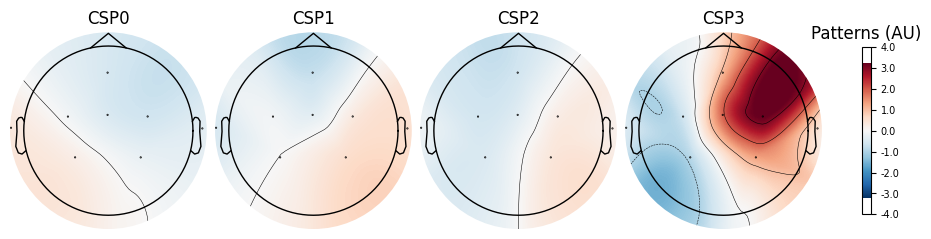

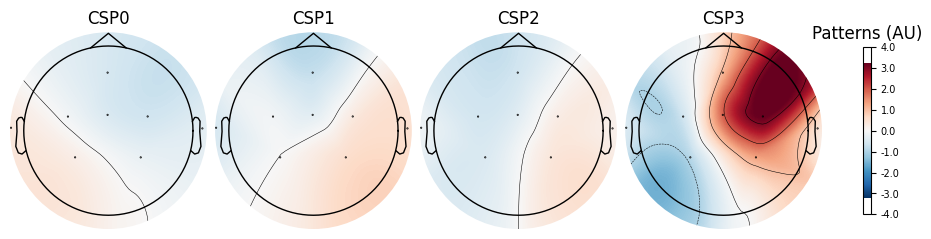

In [17]:


montage = mne.channels.make_standard_montage('standard_1020')
epochs.set_montage(montage)
csp.plot_patterns(epochs.info, ch_type="eeg", units="Patterns (AU)", size=1.5)

In [18]:
print(raw_specific_channels.info)


<Info | 9 non-empty values
 bads: []
 ch_names: EXG1, EXG2, EXG3, EXG4, A1, A2, Cz, Fz, C4, C3, P4, P3
 chs: 4 EOG, 8 EEG
 custom_ref_applied: True
 highpass: 7.0 Hz
 lowpass: 30.0 Hz
 meas_date: 2024-07-23 16:16:41 UTC
 nchan: 12
 projs: []
 sfreq: 2048.0 Hz
 subject_info: 1 item (dict)
>


In [19]:
# all_threshold = [0.0]
# def conv_sample_to_time(sample_id):
#     return sample_id/2048.0 
# for m in range(1,11):
#     ignore_events_threshold = m*0.2
#     all_threshold.append(ignore_events_threshold)
# # ignore_events_threshold = 1.5
#     popped_box_events = []
#     cleaned_box_events = []
#     trial = 0;
#     previous_index_2 = 0
#     previous_index_4 = 0
#     # Iterate through the data and track instances when the value changes
#     for [i,x, value] in all_events:
#         if value==1:
#             cleaned_box_events.append([i,x, value])
#             trial+=1
#         elif value==7:
#             cleaned_box_events.append([i,x, value])
#         elif value==2:
#             cleaned_box_events.append([i,x, value])
#             previous_index_2 = i
#         elif value==4:
#             cleaned_box_events.append([i,x, value])
#             previous_index_4 = i
#         elif value==5:
#             prev_time = conv_sample_to_time(previous_index)
#             curr_time = conv_sample_to_time(i)
#             time_diff = curr_time - prev_time
#             if previous_value==4 and time_diff<ignore_events_threshold:
#                 temp = cleaned_box_events.pop()
#                 popped_box_events.append(temp)
#         elif value==3:
#             prev_time = conv_sample_to_time(previous_index_2)
#             curr_time = conv_sample_to_time(i)
#             time_diff = curr_time - prev_time
#             if time_diff<ignore_events_threshold:
#                 temp = cleaned_box_events.pop()
#                 popped_box_events.append(temp)
#         elif value==6:
#             prev_time = conv_sample_to_time(previous_index_2)
#             curr_time = conv_sample_to_time(i)
#             time_diff = curr_time - prev_time
#             if time_diff<ignore_events_threshold:
#                 temp = cleaned_box_events.pop()
#                 popped_box_events.append(temp)
        

#         previous_value = value
#         previous_index = i

#     print(cleaned_box_events)

#     # Create epochs
#     epochs = mne.Epochs(raw_specific_channels, cleaned_box_events, event_id, tmin, tmax, preload=True)
#     # Create epochs using popped data
#     popped_box_events_np = np.array(popped_box_events)
#     present_event_ids = {key: val for key, val in event_id.items() if val in popped_box_events_np[:, 2]}
#     epochs_2 = mne.Epochs(raw_specific_channels, popped_box_events, present_event_ids, tmin, tmax, preload=True)
    
#     data2 = epochs.get_data(copy=True)
#     labels2 = epochs.events[:, -1]
#     # Label epochs based on event ID
#     labels = epochs.events[:, -1]


#     #count false_neg and true_neg from omitted by threshold
#     cur_4 = 0
#     cur_2 = 0
#     for i in labels:
#         if(i==2):
#             cur_2 = cur_2+1
#         if(i==4):
#             cur_4 = cur_4+1

#     buf_fn = total_2 - cur_2
#     buf_tn = total_4 - cur_4

#     accuracies =[]
#     true_pos = []
#     false_pos = []
#     true_neg = [buf_tn]
#     false_neg = [buf_fn]


#     splits = split_epochs_stratified_kfold(epochs, n_splits=5, random_state=42)
#     for X_train, X_test, y_train, y_test in splits:
#         print(f"train_data_length = {len(X_train)}")
#         print(f"test_data_length = {len(X_test)}")
#         # Initialize CSP

#         csp = CSP(n_components=4, reg='ledoit_wolf', log=True, norm_trace=False)

#         # Create a classification pipeline with CSP and LDA
#         clf = Pipeline([('CSP', csp), ('LDA', LDA())])
#         # Combine the original training data with the new training data
#         X_train_combined = np.concatenate((X_train, data2), axis=0)
#         y_train_combined = np.concatenate((y_train, labels2), axis=0)
#         # Train the classifier
#         clf.fit(X_train_combined, y_train_combined)

#         # Test the classifier
#         y_pred = clf.predict(X_test)
#         print(classification_report(y_test, y_pred))
#         print(y_test)
#         print(y_pred)
#         tp=0
#         tn=0
#         fp=0 
#         fn=0
#         for yt,yp in zip(y_test,y_pred):
#             if((yt==2)and(yp==2)):
#                 tp = tp+1
#             elif((yt==2)and(yp==4)):
#                 fn = fn+1
#             elif((yt==4)and(yp==4)):
#                 tn = tn+1
#             elif((yt==4)and(yp==2)):
#                 fp = fp+1
#         print(f"tp - {tp}")
#         print(f"fn - {fn}")
#         print(f"tn - {tn}")
#         print(f"fp - {fp}")

#         true_pos.append(tp) 
#         false_pos.append(fp)  
#         true_neg.append(tn)  
#         false_neg.append(fn) 



#         accuracy = accuracy_score(y_test, y_pred)
#         accuracies.append(accuracy)

#     average_accuracy = np.mean(accuracies)
    
#     average_true_pos = np.sum(true_pos)/(np.sum(true_pos)+np.sum(false_pos))
#     average_true_neg = np.sum(true_neg)/(np.sum(true_neg)+np.sum(false_neg))
#     average_false_pos = np.sum(false_pos)/(np.sum(true_pos)+np.sum(false_pos))
#     average_false_neg = np.sum(false_neg)/(np.sum(true_neg)+np.sum(false_neg))
#     print(f"average_accuracy - {average_accuracy}")
#     avg_true_pos.append(average_true_pos*100)
#     avg_false_pos.append(average_false_pos*100)
#     avg_true_neg.append(average_true_neg*100)
#     avg_false_neg.append(average_false_neg*100)




In [20]:


all_threshold = [0.0]
def conv_sample_to_time(sample_id):
    return sample_id/2048.0 
for m in range(2,11):
    ignore_events_threshold = m*0.2
    all_threshold.append(ignore_events_threshold)
    if(ignore_events_threshold>0.5):
        tmax = 0.5
    else:
        tmax = ignore_events_threshold
    accuracies =[]
    true_pos = []
    false_pos = []
    true_neg = []
    false_neg = []
    
    event_4_2 = []
    
    for [i,x, value] in all_events:
        if(value==2 or value==4):
            event_4_2.append([i,x, value])
    event_4_2_np = np.array(event_4_2)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # Initialize lists to hold train and test events for each fold
    folds = []
    labels = event_4_2_np[:, 2]
    event_indices = np.arange(len(event_4_2_np))

    # Loop over the cross-validation splits
    for train_index, test_index in skf.split(event_4_2_np,labels):
        train_events = event_4_2_np[train_index]
        test_events = event_4_2_np[test_index]
        folds.append((train_events, test_events))

    # Print the events for each fold
    for j, (train_events, test_events) in enumerate(folds):
        print(f'Fold {j+1}')
#         print('Train Events:', train_events)
#         print('Test Events:', test_events)
#         print()

        # training Create epochs
        training_epochs = mne.Epochs(raw_specific_channels, train_events, event_id, tmin, tmax, preload=True)
        

        # Frequency bands
        freq_bands = [(7, 13), (14, 30)]

        # Apply band-pass filters to the raw data
        filtered_epochs = []
        for fmin, fmax in freq_bands:
            filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
            filtered_epochs.append(filtered)

        # Concatenate the filtered epochs
        Xtr = [e.get_data() for e in filtered_epochs]
        Xtr = np.concatenate(Xtr, axis=1)  # Shape: (n_epochs, n_channels * n_bands, n_times)

        # Flatten the time dimension
        Xtr = Xtr.reshape(Xtr.shape[0], Xtr.shape[1], -1)
        print("length of filtered training epochs data")
        print(len(Xtr))
#         X_train = training_epochs.get_data(copy=True)
        X_train = Xtr
        y_train = training_epochs.events[:, -1]
        
        popped_box_events = []
        cleaned_box_events = []
        remove_train_events = []
        
        train_events_list = train_events.tolist()
        # Filter events to remove specific matches
        for ev in all_events:
            if ev not in train_events_list:
                remove_train_events.append(ev)
        

        
        

        trial = 0;
        previous_index_2 = 0
        previous_index_4 = 0
        # Iterate through the data and track instances when the value changes
        for [i,x, value] in remove_train_events:
            if value==1:
                cleaned_box_events.append([i,x, value])
                trial+=1
            elif value==7:
                cleaned_box_events.append([i,x, value])
            elif value==2:
                cleaned_box_events.append([i,x, value])
                previous_index_2 = i
            elif value==4:
                cleaned_box_events.append([i,x, value])
                previous_index_4 = i
            elif value==5:
                prev_time = conv_sample_to_time(previous_index)
                curr_time = conv_sample_to_time(i)
                time_diff = curr_time - prev_time
                if previous_value==4 and time_diff<ignore_events_threshold:
                    temp = cleaned_box_events.pop()
                    popped_box_events.append(temp)
            elif value==3:
                prev_time = conv_sample_to_time(previous_index_2)
                curr_time = conv_sample_to_time(i)
                time_diff = curr_time - prev_time
                if previous_value==2 and time_diff<ignore_events_threshold:
                    temp = cleaned_box_events.pop()
                    popped_box_events.append(temp)
            elif value==6:
                prev_time = conv_sample_to_time(previous_index_2)
                curr_time = conv_sample_to_time(i)
                time_diff = curr_time - prev_time
                if time_diff<ignore_events_threshold:
                    temp = cleaned_box_events.pop()
                    popped_box_events.append(temp)
        

            previous_value = value
            previous_index = i
        print(f"Threshold {ignore_events_threshold}")
        print(f'Fold {j+1}')
        print("cleaned_box_events")
        print(cleaned_box_events)
        print("popped_box_events")
        print(popped_box_events)
        
        
        cleaned_box_events_np = np.array(cleaned_box_events)
        present_event_ids = {key: val for key, val in event_id.items() if val in cleaned_box_events_np[:, 2]}
        # Create test  epochs
        test_epochs = mne.Epochs(raw_specific_channels, cleaned_box_events, present_event_ids, tmin, tmax, preload=True)
        # Frequency bands
        freq_bands = [(7, 13), (14, 30)]

        # Apply band-pass filters to the raw data
        filtered_epochs = []
        for fmin, fmax in freq_bands:
            filtered = test_epochs.copy().filter(fmin, fmax, fir_design='firwin')
            filtered_epochs.append(filtered)

        # Concatenate the filtered epochs
        Xts = [e.get_data() for e in filtered_epochs]
        Xts = np.concatenate(Xts, axis=1)  # Shape: (n_epochs, n_channels * n_bands, n_times)

        # Flatten the time dimension
        Xts = Xts.reshape(Xts.shape[0], Xts.shape[1], -1)
        print(f"Threshold {ignore_events_threshold}")
        print("length of filtered test epochs data")
        print(len(Xts))
#         X_train = training_epochs.get_data(copy=True)
        X_test = Xts
#         X_test = test_epochs.get_data(copy=True)
        y_test = test_epochs.events[:, -1]
        csp = CSP(n_components=4, reg='ledoit_wolf', log=True, norm_trace=False)

        # Create a classification pipeline with CSP and LDA
        clf = Pipeline([('CSP', csp), ('LDA', LDA())])        
        # Train the classifier
        clf.fit(X_train, y_train)

        # Test the classifier
        y_pred = clf.predict(X_test)        
        
        print(classification_report(y_test, y_pred))
        print(y_test)
        print(y_pred)    
        
        #count false_neg and true_neg from omitted by threshold
        cur_4 = 0
        cur_2 = 0
        for [i,x, value] in popped_box_events:
            if(value==2):
                cur_2 = cur_2+1
            if(value==4):
                cur_4 = cur_4+1
        tp=0
        tn=cur_4
        fp=0 
        fn=cur_2
        for yt,yp in zip(y_test,y_pred):
            if((yt==2)and(yp==2)):
                tp = tp+1
            elif((yt==2)and(yp==4)):
                fn = fn+1
            elif((yt==4)and(yp==4)):
                tn = tn+1
            elif((yt==4)and(yp==2)):
                fp = fp+1    

        print(f"tp - {tp}")
        print(f"fn - {fn}")
        print(f"tn - {tn}")
        print(f"fp - {fp}")

        true_pos.append(tp) 
        false_pos.append(fp)  
        true_neg.append(tn)  
        false_neg.append(fn) 



        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    average_accuracy = np.mean(accuracies)
    
    average_true_pos = np.sum(true_pos)/(np.sum(true_pos)+np.sum(false_pos)) # precision
    average_true_neg = np.sum(true_neg)/(np.sum(true_neg)+np.sum(false_neg)) # precision
    average_false_pos = np.sum(true_pos)/(np.sum(true_pos)+np.sum(false_neg)) # sensitity is calculated, variable name wrong
    average_false_neg = np.sum(true_neg)/(np.sum(true_neg)+np.sum(false_pos)) # specificity is calcualte, variable name wrong
    print(f"average_accuracy - {average_accuracy}")
    avg_true_pos.append(average_true_pos)
    avg_false_pos.append(average_false_pos)
    avg_true_neg.append(average_true_neg)
    avg_false_neg.append(average_false_neg)
    sum_true_pos.append(np.sum(true_pos))
    sum_false_pos.append(np.sum(false_pos))
    sum_true_neg.append(np.sum(true_neg))
    sum_false_neg.append(np.sum(false_neg))




Fold 1
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 1844 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 7 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 3381 samples (1.651 s)

Setting up band-pass filter from 14 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window wi

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (1844), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (1931) is longer than the signal (1844), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks

length of filtered training epochs data
94
Threshold 0.4
Fold 1
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [201152, 0, 2], [213073, 0, 7], [217552, 0, 1], [217719, 0, 4], [228979, 0, 7], [232685, 0, 1], [233013, 0, 4], [250325, 0, 7], [254794, 0, 1], [263819, 0, 2], [269091, 0, 7], [276688, 0, 1], [284154, 0, 2], [289525, 0, 7], [299721, 0, 1], [305240, 0, 4], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [354147, 0, 4], [359624, 0, 2], [364063, 0, 2], [368299, 0, 4], [379302, 0, 2], [384626, 0, 7], [388704, 0, 1], [392858, 0, 4], [404934, 0, 7], [409196, 0, 1], [409971, 0, 4], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [542552, 0, 2], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [592041, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [635655, 0, 4], [644

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: filter_length (3381) is longer than the signal (1844), distortion is likely. Reduce filter length or filter a longer signal

Threshold 0.4
length of filtered test epochs data
21
Computing rank from data with rank=None
    Using tolerance 2.8e-05 (2.2e-16 eps * 24 dim * 5.2e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.67      0.55      0.60        11
           4       0.58      0.70      0.64        10

    accuracy                           0.62        21
   macro avg       0.62      0.62      0.62        21
weighted avg       0.63      0.62      0.62        21

[2 4 4 2 2 4 4 2 2 4 2 4 4 2 2 4 4 4 2 2 2]
[4 2 2 2 4 4 4 2 2 2 4 4 4 2 4 4 4 4 2 2 4]
tp - 6
fn - 5
tn - 10
fp - 3
Fold 2
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (1844), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (1931) is longer than the signal (1844), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')


length of filtered training epochs data
94
Threshold 0.4
Fold 2
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [223678, 0, 2], [228979, 0, 7], [232685, 0, 1], [242723, 0, 4], [250325, 0, 7], [254794, 0, 1], [261368, 0, 2], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [308961, 0, 4], [325345, 0, 7], [331171, 0, 1], [331941, 0, 4], [345492, 0, 7], [352707, 0, 1], [369833, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [420521, 0, 4], [434518, 0, 7], [439052, 0, 1], [458219, 0, 2], [463582, 0, 7], [468493, 0, 1], [477006, 0, 2], [480737, 0, 2], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [511563, 0, 4], [519201, 0, 7], [523289, 0, 1], [545280, 0, 2], [546547, 0, 4], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [637935, 0, 2], [644807, 0, 7], [648405, 0, 1], [649

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

Threshold 0.4
length of filtered test epochs data
18
Computing rank from data with rank=None
    Using tolerance 2.8e-05 (2.2e-16 eps * 24 dim * 5.3e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.78      0.70      0.74        10
           4       0.67      0.75      0.71         8

    accuracy                           0.72        18
   macro avg       0.72      0.72      0.72        18
weighted avg       0.73      0.72      0.72        18

[2 4 2 4 4 2 4 2 2 2 4 2 4 2 4 4 2 2]
[4 2 2 4 4 2 4 4 2 2 4 2 2 4 4 4 2 2]
tp - 7
fn - 4
tn - 11
fp - 2
Fold 3
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
App

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (1844), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (1931) is longer than the signal (1844), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks

length of filtered training epochs data
94
Threshold 0.4
Fold 3
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [245012, 0, 2], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [300352, 0, 4], [313474, 0, 2], [316960, 0, 4], [325345, 0, 7], [331171, 0, 1], [336567, 0, 2], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [399566, 0, 2], [404934, 0, 7], [409196, 0, 1], [414592, 0, 4], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [496045, 0, 2], [501402, 0, 7], [505887, 0, 1], [513804, 0, 2], [519201, 0, 7], [523289, 0, 1], [535985, 0, 2], [552400, 0, 2], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [597485, 0, 4], [607302, 0, 7], [611341, 0, 1], [614252, 0, 2], [619630, 0, 7], [623546, 0, 1], [639435, 0, 2], [644807, 0, 7], [648405, 0, 1], [663

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: filter_length (3381) is longer than the signal (1844), distort

    Using tolerance 2.8e-05 (2.2e-16 eps * 24 dim * 5.3e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.86      0.60      0.71        10
           4       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.68      0.70      0.66        15
weighted avg       0.74      0.67      0.68        15

[2 4 2 4 2 2 4 2 2 2 2 4 2 2 4]
[2 4 4 2 2 2 4 2 4 2 4 4 4 2 4]
tp - 6
fn - 5
tn - 12
fp - 1
Fold 4
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (1844), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (1931) is longer than the signal (1844), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')


length of filtered training epochs data
95
Threshold 0.4
Fold 4
cleaned_box_events
[[173680, 0, 1], [187480, 0, 2], [195251, 0, 7], [199560, 0, 1], [207801, 0, 2], [213073, 0, 7], [217552, 0, 1], [222203, 0, 4], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [417909, 0, 2], [429137, 0, 2], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [474212, 0, 4], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [508895, 0, 4], [519201, 0, 7], [523289, 0, 1], [539631, 0, 2], [557732, 0, 7], [561880, 0, 1], [562226, 0, 4], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [601944, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [656189, 0, 4], [663083, 0, 7], [667357, 0, 1], [680247, 0, 2], [697

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

Threshold 0.4
length of filtered test epochs data
16
Computing rank from data with rank=None
    Using tolerance 2.8e-05 (2.2e-16 eps * 24 dim * 5.2e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.88      0.70      0.78        10
           4       0.62      0.83      0.71         6

    accuracy                           0.75        16
   macro avg       0.75      0.77      0.75        16
weighted avg       0.78      0.75      0.75        16

[2 2 4 2 2 4 4 2 4 2 4 2 2 2 2 4]
[2 2 4 2 2 4 4 4 2 2 4 4 2 4 2 4]
tp - 7
fn - 3
tn - 12
fp - 1
Fold 5
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying ba

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (1844), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (1931) is longer than the signal (1844), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')


length of filtered training epochs data
95
Threshold 0.4
Fold 5
cleaned_box_events
[[173680, 0, 1], [180103, 0, 4], [189864, 0, 2], [195251, 0, 7], [199560, 0, 1], [203785, 0, 2], [206170, 0, 4], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [238791, 0, 4], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [280181, 0, 4], [289525, 0, 7], [299721, 0, 1], [319994, 0, 2], [325345, 0, 7], [331171, 0, 1], [340127, 0, 2], [345492, 0, 7], [352707, 0, 1], [375330, 0, 2], [384626, 0, 7], [388704, 0, 1], [395075, 0, 4], [404934, 0, 7], [409196, 0, 1], [424617, 0, 4], [434518, 0, 7], [439052, 0, 1], [441107, 0, 4], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [567759, 0, 2], [573062, 0, 7], [577447, 0, 1], [581015, 0, 2], [586285, 0, 7], [590042, 0, 1], [591013, 0, 4], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

Threshold 0.4
length of filtered test epochs data
19
Computing rank from data with rank=None
    Using tolerance 2.8e-05 (2.2e-16 eps * 24 dim * 5.3e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.78      0.78      0.78         9
           4       0.80      0.80      0.80        10

    accuracy                           0.79        19
   macro avg       0.79      0.79      0.79        19
weighted avg       0.79      0.79      0.79        19

[4 2 2 4 4 4 2 2 2 4 4 4 2 2 4 4 2 4 2]
[4 2 2 2 4 4 2 2 2 4 2 4 4 4 4 4 2 4 2]
tp - 7
fn - 3
tn - 11
fp - 2
average_accuracy - 0.7094820384294069
Fold 1
Not setting metadata
94 matching events found
Sett

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


length of filtered training epochs data
94
Threshold 0.6000000000000001
Fold 1
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [217719, 0, 4], [228979, 0, 7], [232685, 0, 1], [233013, 0, 4], [250325, 0, 7], [254794, 0, 1], [263819, 0, 2], [269091, 0, 7], [276688, 0, 1], [284154, 0, 2], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [359624, 0, 2], [364063, 0, 2], [368299, 0, 4], [379302, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [592041, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [635655, 0, 4], [644807, 0, 7], [648405, 0, 1], [651535, 0, 4], [663083, 0, 7], [667357, 0, 1], [6851

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distort

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.62      0.62      0.62         8
           4       0.40      0.40      0.40         5

    accuracy                           0.54        13
   macro avg       0.51      0.51      0.51        13
weighted avg       0.54      0.54      0.54        13

[4 4 2 2 2 2 4 2 2 4 4 2 2]
[2 4 2 4 2 2 2 4 4 2 4 2 2]
tp - 5
fn - 6
tn - 10
fp - 3
Fold 2
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events a

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 0.6000000000000001
Fold 2
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [223678, 0, 2], [228979, 0, 7], [232685, 0, 1], [242723, 0, 4], [250325, 0, 7], [254794, 0, 1], [261368, 0, 2], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [369833, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [420521, 0, 4], [434518, 0, 7], [439052, 0, 1], [458219, 0, 2], [463582, 0, 7], [468493, 0, 1], [477006, 0, 2], [480737, 0, 2], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [511563, 0, 4], [519201, 0, 7], [523289, 0, 1], [546547, 0, 4], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [674279, 0, 4], [6970

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.67      0.75      0.71         8
           4       0.50      0.40      0.44         5

    accuracy                           0.62        13
   macro avg       0.58      0.57      0.58        13
weighted avg       0.60      0.62      0.61        13

[2 4 2 2 4 2 2 2 4 4 4 2 2]
[2 2 2 4 2 2 2 2 4 2 4 4 2]
tp - 6
fn - 5
tn - 10
fp - 3
Fold 3
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events a

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 0.6000000000000001
Fold 3
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [245012, 0, 2], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [300352, 0, 4], [316960, 0, 4], [325345, 0, 7], [331171, 0, 1], [336567, 0, 2], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [399566, 0, 2], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [496045, 0, 2], [501402, 0, 7], [505887, 0, 1], [513804, 0, 2], [519201, 0, 7], [523289, 0, 1], [535985, 0, 2], [552400, 0, 2], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [597485, 0, 4], [607302, 0, 7], [611341, 0, 1], [614252, 0, 2], [619630, 0, 7], [623546, 0, 1], [639435, 0, 2], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [6673

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.67      0.80         9
           4       0.57      1.00      0.73         4

    accuracy                           0.77        13
   macro avg       0.79      0.83      0.76        13
weighted avg       0.87      0.77      0.78        13

[2 4 4 2 2 2 2 2 2 4 2 2 4]
[2 4 4 2 4 2 4 2 2 4 4 2 4]
tp - 6
fn - 5
tn - 13
fp - 0
Fold 4
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


length of filtered training epochs data
95
Threshold 0.6000000000000001
Fold 4
cleaned_box_events
[[173680, 0, 1], [187480, 0, 2], [195251, 0, 7], [199560, 0, 1], [207801, 0, 2], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [429137, 0, 2], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [508895, 0, 4], [519201, 0, 7], [523289, 0, 1], [539631, 0, 2], [557732, 0, 7], [561880, 0, 1], [562226, 0, 4], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [601944, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [656189, 0, 4], [663083, 0, 7], [667357, 0, 1], [680247, 0, 2], [697087, 0, 7], [700798, 0, 1], [7140

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distort

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.88      0.78      0.82         9
           4       0.60      0.75      0.67         4

    accuracy                           0.77        13
   macro avg       0.74      0.76      0.75        13
weighted avg       0.79      0.77      0.78        13

[2 2 2 4 2 4 2 4 2 2 2 2 4]
[2 2 2 4 2 2 2 4 4 2 4 2 4]
tp - 7
fn - 3
tn - 12
fp - 1
Fold 5
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events a

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
95
Threshold 0.6000000000000001
Fold 5
cleaned_box_events
[[173680, 0, 1], [180103, 0, 4], [189864, 0, 2], [195251, 0, 7], [199560, 0, 1], [203785, 0, 2], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [319994, 0, 2], [325345, 0, 7], [331171, 0, 1], [340127, 0, 2], [345492, 0, 7], [352707, 0, 1], [375330, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [424617, 0, 4], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [567759, 0, 2], [573062, 0, 7], [577447, 0, 1], [581015, 0, 2], [586285, 0, 7], [590042, 0, 1], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [653221, 0, 4], [657702, 0, 2], [663083, 0, 7], [667357, 0, 1], [6970

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.88      0.78      0.82         9
           4       0.50      0.67      0.57         3

    accuracy                           0.75        12
   macro avg       0.69      0.72      0.70        12
weighted avg       0.78      0.75      0.76        12

[4 2 2 2 2 2 4 2 2 4 2 2]
[4 2 2 2 2 2 2 4 2 4 4 2]
tp - 7
fn - 3
tn - 12
fp - 1
average_accuracy - 0.6884615384615385
Fold 1
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data fr

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 0.8
Fold 1
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [217719, 0, 4], [228979, 0, 7], [232685, 0, 1], [233013, 0, 4], [250325, 0, 7], [254794, 0, 1], [263819, 0, 2], [269091, 0, 7], [276688, 0, 1], [284154, 0, 2], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [359624, 0, 2], [364063, 0, 2], [379302, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [592041, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [635655, 0, 4], [644807, 0, 7], [648405, 0, 1], [651535, 0, 4], [663083, 0, 7], [667357, 0, 1], [685175, 0, 2], [691722, 0, 2], [697

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.71      0.62      0.67         8
           4       0.40      0.50      0.44         4

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.61      0.58      0.59        12

[4 4 2 2 2 2 2 2 4 4 2 2]
[2 4 2 4 2 2 4 4 2 4 2 2]
tp - 5
fn - 6
tn - 11
fp - 2
Fold 2
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 0.8
Fold 2
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [223678, 0, 2], [228979, 0, 7], [232685, 0, 1], [242723, 0, 4], [250325, 0, 7], [254794, 0, 1], [261368, 0, 2], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [420521, 0, 4], [434518, 0, 7], [439052, 0, 1], [458219, 0, 2], [463582, 0, 7], [468493, 0, 1], [477006, 0, 2], [480737, 0, 2], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [546547, 0, 4], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [674279, 0, 4], [697087, 0, 7], [700798, 0, 1], [724329, 0, 2], [749

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.62      0.83      0.71         6
           4       0.50      0.25      0.33         4

    accuracy                           0.60        10
   macro avg       0.56      0.54      0.52        10
weighted avg       0.57      0.60      0.56        10

[2 4 2 4 2 2 2 4 4 2]
[2 2 2 2 2 2 2 2 4 4]
tp - 5
fn - 6
tn - 10
fp - 3
Fold 3
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2049 orig

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


length of filtered training epochs data
94
Threshold 0.8
Fold 3
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [245012, 0, 2], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [316960, 0, 4], [325345, 0, 7], [331171, 0, 1], [336567, 0, 2], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [399566, 0, 2], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [496045, 0, 2], [501402, 0, 7], [505887, 0, 1], [513804, 0, 2], [519201, 0, 7], [523289, 0, 1], [535985, 0, 2], [552400, 0, 2], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [597485, 0, 4], [607302, 0, 7], [611341, 0, 1], [614252, 0, 2], [619630, 0, 7], [623546, 0, 1], [639435, 0, 2], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [697087, 0, 7], [700

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distort

    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.67      0.80         9
           4       0.40      1.00      0.57         2

    accuracy                           0.73        11
   macro avg       0.70      0.83      0.69        11
weighted avg       0.89      0.73      0.76        11

[2 4 2 2 2 2 2 2 4 2 2]
[2 4 2 4 2 4 2 2 4 4 2]
tp - 6
fn - 5
tn - 13
fp - 0
Fold 4
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 or

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
95
Threshold 0.8
Fold 4
cleaned_box_events
[[173680, 0, 1], [187480, 0, 2], [195251, 0, 7], [199560, 0, 1], [207801, 0, 2], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [429137, 0, 2], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [508895, 0, 4], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [562226, 0, 4], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [601944, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [680247, 0, 2], [697087, 0, 7], [700798, 0, 1], [730848, 0, 2], [749759, 0, 7], [753819, 0, 1], [765

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.83      0.83      0.83         6
           4       0.50      0.50      0.50         2

    accuracy                           0.75         8
   macro avg       0.67      0.67      0.67         8
weighted avg       0.75      0.75      0.75         8

[2 2 2 4 4 2 2 2]
[2 2 2 4 2 2 4 2]
tp - 5
fn - 5
tn - 12
fp - 1
Fold 5
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 original tim

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1931 samples (0.943 s)

length of filtered training epochs data
95
Threshold 0.8
Fold 5
cleaned_box_events
[[173680, 0, 1], [189864, 0, 2], [195251, 0, 7], [199560, 0, 1], [203785, 0, 2], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [319994, 0, 2], [325345, 0, 7], [331171, 0, 1], [340127, 0, 2], [345492, 0, 7], [352707, 0, 1], [375330, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [567759, 0, 2], [573062, 0, 7], [577447, 0, 1], [581015, 0, 2], [586285, 0, 7], [590042, 0, 1], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [6

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.78      0.88         9
           4       0.33      1.00      0.50         1

    accuracy                           0.80        10
   macro avg       0.67      0.89      0.69        10
weighted avg       0.93      0.80      0.84        10

[2 2 2 2 2 2 2 4 2 2]
[2 2 2 2 2 4 2 4 4 2]
tp - 7
fn - 3
tn - 13
fp - 0
average_accuracy - 0.6921212121212121
Fold 1
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from prelo

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 1.0
Fold 1
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [217719, 0, 4], [228979, 0, 7], [232685, 0, 1], [233013, 0, 4], [250325, 0, 7], [254794, 0, 1], [263819, 0, 2], [269091, 0, 7], [276688, 0, 1], [284154, 0, 2], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [359624, 0, 2], [364063, 0, 2], [379302, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [592041, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [635655, 0, 4], [644807, 0, 7], [648405, 0, 1], [651535, 0, 4], [663083, 0, 7], [667357, 0, 1], [685175, 0, 2], [691722, 0, 2], [697

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.71      0.62      0.67         8
           4       0.40      0.50      0.44         4

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.61      0.58      0.59        12

[4 4 2 2 2 2 2 2 4 4 2 2]
[2 4 2 4 2 2 4 4 2 4 2 2]
tp - 5
fn - 6
tn - 11
fp - 2
Fold 2
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 1.0
Fold 2
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [223678, 0, 2], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [261368, 0, 2], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [420521, 0, 4], [434518, 0, 7], [439052, 0, 1], [458219, 0, 2], [463582, 0, 7], [468493, 0, 1], [477006, 0, 2], [480737, 0, 2], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [546547, 0, 4], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [674279, 0, 4], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [753819, 0, 1], [765

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.71      1.00      0.83         5
           4       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8

[2 2 4 2 2 2 4 4]
[2 2 2 2 2 2 2 4]
tp - 5
fn - 6
tn - 11
fp - 2
Fold 3
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2049 original tim

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 1.0
Fold 3
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [245012, 0, 2], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [336567, 0, 2], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [399566, 0, 2], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [496045, 0, 2], [501402, 0, 7], [505887, 0, 1], [513804, 0, 2], [519201, 0, 7], [523289, 0, 1], [535985, 0, 2], [552400, 0, 2], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [597485, 0, 4], [607302, 0, 7], [611341, 0, 1], [614252, 0, 2], [619630, 0, 7], [623546, 0, 1], [639435, 0, 2], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [697087, 0, 7], [700798, 0, 1], [749

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.67      0.80         9
           4       0.25      1.00      0.40         1

    accuracy                           0.70        10
   macro avg       0.62      0.83      0.60        10
weighted avg       0.93      0.70      0.76        10

[2 2 2 2 2 2 2 4 2 2]
[2 2 4 2 4 2 2 4 4 2]
tp - 6
fn - 5
tn - 13
fp - 0
Fold 4
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 origin

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
95
Threshold 1.0
Fold 4
cleaned_box_events
[[173680, 0, 1], [187480, 0, 2], [195251, 0, 7], [199560, 0, 1], [207801, 0, 2], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [429137, 0, 2], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [601944, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [680247, 0, 2], [697087, 0, 7], [700798, 0, 1], [730848, 0, 2], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popped_box_events
[[

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.83      0.91         6
           4       0.00      0.00      0.00         0

    accuracy                           0.83         6
   macro avg       0.50      0.42      0.45         6
weighted avg       1.00      0.83      0.91         6

[2 2 2 2 2 2]
[2 2 2 2 4 2]
tp - 5
fn - 5
tn - 13
fp - 0
Fold 5
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 original time points

/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Setting up band-pass filter from 14 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 14.00
- Lower transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 12.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1931 samples (0.943 s)

length of filtered training epochs data
95
Threshold 1.0
Fold 5
cleaned_box_events
[[173680, 0, 1], [189864, 0, 2], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [319994, 0, 2], [325345, 0, 7], [331171, 0, 1], [340127, 0, 2], [345492, 0, 7], [352707, 0, 1], [375330, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0,

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__

Threshold 1.0
length of filtered test epochs data
9
Computing rank from data with rank=None


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:144: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xts = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:144: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xts = [e.get_data() for e in filtered_epochs]


    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.75      0.86         8
           4       0.33      1.00      0.50         1

    accuracy                           0.78         9
   macro avg       0.67      0.88      0.68         9
weighted avg       0.93      0.78      0.82         9

[2 2 2 2 2 2 4 2 2]
[2 2 2 2 4 2 4 4 2]
tp - 6
fn - 4
tn - 13
fp - 0
average_accuracy - 0.7288888888888889
Fold 1
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 1.2000000000000002
Fold 1
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [263819, 0, 2], [269091, 0, 7], [276688, 0, 1], [284154, 0, 2], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [379302, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [592041, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [635655, 0, 4], [644807, 0, 7], [648405, 0, 1], [651535, 0, 4], [663083, 0, 7], [667357, 0, 1], [685175, 0, 2], [691722, 0, 2], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [7538

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.75      0.50      0.60         6
           4       0.25      0.50      0.33         2

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.62      0.50      0.53         8

[2 2 2 2 4 4 2 2]
[2 4 4 4 2 4 2 2]
tp - 3
fn - 8
tn - 12
fp - 1
Fold 2
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2049 original tim

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 1.2000000000000002
Fold 2
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [223678, 0, 2], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [420521, 0, 4], [434518, 0, 7], [439052, 0, 1], [458219, 0, 2], [463582, 0, 7], [468493, 0, 1], [480737, 0, 2], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [546547, 0, 4], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popped_box_events
[[2

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.60      1.00      0.75         3
           4       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5

[2 4 2 2 4]
[2 2 2 2 2]
tp - 3
fn - 8
tn - 11
fp - 2
Fold 3
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2049 original time points ...

/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

Setting up band-pass filter from 14 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 14.00
- Lower transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 12.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1931 samples (0.943 s)

length of filtered training epochs data
94
Threshold 1.2000000000000002
Fold 3
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [245012, 0, 2], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [399566, 0, 2], [404934, 0, 7], [409196, 0, 1], [434518, 0, 

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__

Threshold 1.2000000000000002
length of filtered test epochs data
8
Computing rank from data with rank=None


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:144: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xts = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:144: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xts = [e.get_data() for e in filtered_epochs]


    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.57      0.73         7
           4       0.25      1.00      0.40         1

    accuracy                           0.62         8
   macro avg       0.62      0.79      0.56         8
weighted avg       0.91      0.62      0.69         8

[2 2 2 2 2 4 2 2]
[2 4 2 4 2 4 4 2]
tp - 4
fn - 7
tn - 13
fp - 0
Fold 4
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 original time 

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
95
Threshold 1.2000000000000002
Fold 4
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [207801, 0, 2], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [429137, 0, 2], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [601944, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [680247, 0, 2], [697087, 0, 7], [700798, 0, 1], [730848, 0, 2], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popped_box_events
[[1

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.80      0.89         5
           4       0.00      0.00      0.00         0

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5

[2 2 2 2 2]
[2 2 2 4 2]
tp - 4
fn - 6
tn - 13
fp - 0
Fold 5
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 original time points ...

/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Setting up band-pass filter from 14 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 14.00
- Lower transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 12.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1931 samples (0.943 s)

length of filtered training epochs data
95
Threshold 1.2000000000000002
Fold 5
cleaned_box_events
[[173680, 0, 1], [189864, 0, 2], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [319994, 0, 2], [325345, 0, 7], [331171, 0, 1], [340127, 0, 2], [345492, 0, 7], [352707, 0, 1], [375330, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.75      0.86         8
           4       0.33      1.00      0.50         1

    accuracy                           0.78         9
   macro avg       0.67      0.88      0.68         9
weighted avg       0.93      0.78      0.82         9

[2 2 2 2 2 2 4 2 2]
[2 2 2 2 4 2 4 4 2]
tp - 6
fn - 4
tn - 13
fp - 0
average_accuracy - 0.6605555555555556
Fold 1
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 1.4000000000000001
Fold 1
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [263819, 0, 2], [269091, 0, 7], [276688, 0, 1], [284154, 0, 2], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [379302, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [592041, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [635655, 0, 4], [644807, 0, 7], [648405, 0, 1], [651535, 0, 4], [663083, 0, 7], [667357, 0, 1], [691722, 0, 2], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [753819, 0, 1], [7654

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.67      0.40      0.50         5
           4       0.25      0.50      0.33         2

    accuracy                           0.43         7
   macro avg       0.46      0.45      0.42         7
weighted avg       0.55      0.43      0.45         7

[2 2 2 2 4 4 2]
[2 4 4 4 2 4 2]
tp - 2
fn - 9
tn - 12
fp - 1
Fold 2
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2049 original time po

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 1.4000000000000001
Fold 2
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [223678, 0, 2], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [458219, 0, 2], [463582, 0, 7], [468493, 0, 1], [480737, 0, 2], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [546547, 0, 4], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popped_box_events
[[242723, 0, 4], [2

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.75      1.00      0.86         3
           4       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

[2 2 2 4]
[2 2 2 2]
tp - 3
fn - 8
tn - 12
fp - 1
Fold 3
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2049 original time points ...
0 b

/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

Setting up band-pass filter from 14 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 14.00
- Lower transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 12.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1931 samples (0.943 s)

length of filtered training epochs data
94
Threshold 1.4000000000000001
Fold 3
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [245012, 0, 2], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [399566, 0, 2], [404934, 0, 7], [409196, 0, 1], [434518, 0, 

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__

Threshold 1.4000000000000001
length of filtered test epochs data
8
Computing rank from data with rank=None


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:144: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xts = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:144: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xts = [e.get_data() for e in filtered_epochs]


    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.57      0.73         7
           4       0.25      1.00      0.40         1

    accuracy                           0.62         8
   macro avg       0.62      0.79      0.56         8
weighted avg       0.91      0.62      0.69         8

[2 2 2 2 2 4 2 2]
[2 4 2 4 2 4 4 2]
tp - 4
fn - 7
tn - 13
fp - 0
Fold 4
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 original time 

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
95
Threshold 1.4000000000000001
Fold 4
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [207801, 0, 2], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [429137, 0, 2], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [601944, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [680247, 0, 2], [697087, 0, 7], [700798, 0, 1], [730848, 0, 2], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popped_box_events
[[1

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.80      0.89         5
           4       0.00      0.00      0.00         0

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5

[2 2 2 2 2]
[2 2 2 4 2]
tp - 4
fn - 6
tn - 13
fp - 0
Fold 5
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 original time points ...

/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Setting up band-pass filter from 14 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 14.00
- Lower transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 12.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1931 samples (0.943 s)

length of filtered training epochs data
95
Threshold 1.4000000000000001
Fold 5
cleaned_box_events
[[173680, 0, 1], [189864, 0, 2], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [319994, 0, 2], [325345, 0, 7], [331171, 0, 1], [340127, 0, 2], [345492, 0, 7], [352707, 0, 1], [375330, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.75      0.86         8
           4       0.33      1.00      0.50         1

    accuracy                           0.78         9
   macro avg       0.67      0.88      0.68         9
weighted avg       0.93      0.78      0.82         9

[2 2 2 2 2 2 4 2 2]
[2 2 2 2 4 2 4 4 2]
tp - 6
fn - 4
tn - 13
fp - 0
average_accuracy - 0.6762698412698412
Fold 1
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 1.6
Fold 1
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [263819, 0, 2], [269091, 0, 7], [276688, 0, 1], [284154, 0, 2], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [379302, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [592041, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [635655, 0, 4], [644807, 0, 7], [648405, 0, 1], [651535, 0, 4], [663083, 0, 7], [667357, 0, 1], [691722, 0, 2], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.67      0.40      0.50         5
           4       0.25      0.50      0.33         2

    accuracy                           0.43         7
   macro avg       0.46      0.45      0.42         7
weighted avg       0.55      0.43      0.45         7

[2 2 2 2 4 4 2]
[2 4 4 4 2 4 2]
tp - 2
fn - 9
tn - 12
fp - 1
Fold 2
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2049 original time po

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 1.6
Fold 2
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [223678, 0, 2], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [458219, 0, 2], [463582, 0, 7], [468493, 0, 1], [480737, 0, 2], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popped_box_events
[[242723, 0, 4], [261368, 0, 2], [308961, 0, 4], [

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

[2 2 2]
[2 2 2]
tp - 3
fn - 8
tn - 13
fp - 0
Fold 3
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2049 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 7 - 13 

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 1.6
Fold 3
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [245012, 0, 2], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [399566, 0, 2], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [496045, 0, 2], [501402, 0, 7], [505887, 0, 1], [513804, 0, 2], [519201, 0, 7], [523289, 0, 1], [552400, 0, 2], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [597485, 0, 4], [607302, 0, 7], [611341, 0, 1], [614252, 0, 2], [619630, 0, 7], [623546, 0, 1], [639435, 0, 2], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [753819, 0, 1], [765

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.57      0.73         7
           4       0.25      1.00      0.40         1

    accuracy                           0.62         8
   macro avg       0.62      0.79      0.56         8
weighted avg       0.91      0.62      0.69         8

[2 2 2 2 2 4 2 2]
[2 4 2 4 2 4 4 2]
tp - 4
fn - 7
tn - 13
fp - 0
Fold 4
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 original time 

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
95
Threshold 1.6
Fold 4
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [207801, 0, 2], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [429137, 0, 2], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [601944, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [680247, 0, 2], [697087, 0, 7], [700798, 0, 1], [730848, 0, 2], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popped_box_events
[[187480, 0, 2], [

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.80      0.89         5
           4       0.00      0.00      0.00         0

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5

[2 2 2 2 2]
[2 2 2 4 2]
tp - 4
fn - 6
tn - 13
fp - 0
Fold 5
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 original time points ...

/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Setting up band-pass filter from 14 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 14.00
- Lower transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 12.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1931 samples (0.943 s)

length of filtered training epochs data
95
Threshold 1.6
Fold 5
cleaned_box_events
[[173680, 0, 1], [189864, 0, 2], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [319994, 0, 2], [325345, 0, 7], [331171, 0, 1], [340127, 0, 2], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0,

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.71      0.83         7
           4       0.33      1.00      0.50         1

    accuracy                           0.75         8
   macro avg       0.67      0.86      0.67         8
weighted avg       0.92      0.75      0.79         8

[2 2 2 2 2 4 2 2]
[2 2 2 4 2 4 4 2]
tp - 5
fn - 5
tn - 13
fp - 0
average_accuracy - 0.7207142857142858
Fold 1
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


length of filtered training epochs data
94
Threshold 1.8
Fold 1
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [263819, 0, 2], [269091, 0, 7], [276688, 0, 1], [284154, 0, 2], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [379302, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [592041, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [635655, 0, 4], [644807, 0, 7], [648405, 0, 1], [651535, 0, 4], [663083, 0, 7], [667357, 0, 1], [691722, 0, 2], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popp

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distort

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.67      0.40      0.50         5
           4       0.25      0.50      0.33         2

    accuracy                           0.43         7
   macro avg       0.46      0.45      0.42         7
weighted avg       0.55      0.43      0.45         7

[2 2 2 2 4 4 2]
[2 4 4 4 2 4 2]
tp - 2
fn - 9
tn - 12
fp - 1
Fold 2
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2049 original time po

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


length of filtered training epochs data
94
Threshold 1.8
Fold 2
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [223678, 0, 2], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [458219, 0, 2], [463582, 0, 7], [468493, 0, 1], [480737, 0, 2], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popped_box_events
[[242723, 0, 4], [261368, 0, 2], [308961, 0, 4], [

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distort

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

[2 2 2]
[2 2 2]
tp - 3
fn - 8
tn - 13
fp - 0
Fold 3
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2049 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 7 - 13 

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 1.8
Fold 3
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [245012, 0, 2], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [399566, 0, 2], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [496045, 0, 2], [501402, 0, 7], [505887, 0, 1], [513804, 0, 2], [519201, 0, 7], [523289, 0, 1], [552400, 0, 2], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [597485, 0, 4], [607302, 0, 7], [611341, 0, 1], [614252, 0, 2], [619630, 0, 7], [623546, 0, 1], [639435, 0, 2], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [753819, 0, 1], [765

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.57      0.73         7
           4       0.25      1.00      0.40         1

    accuracy                           0.62         8
   macro avg       0.62      0.79      0.56         8
weighted avg       0.91      0.62      0.69         8

[2 2 2 2 2 4 2 2]
[2 4 2 4 2 4 4 2]
tp - 4
fn - 7
tn - 13
fp - 0
Fold 4
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 original time 

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
95
Threshold 1.8
Fold 4
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [207801, 0, 2], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [429137, 0, 2], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [601944, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [680247, 0, 2], [697087, 0, 7], [700798, 0, 1], [730848, 0, 2], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popped_box_events
[[187480, 0, 2], [

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.80      0.89         5
           4       0.00      0.00      0.00         0

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5

[2 2 2 2 2]
[2 2 2 4 2]
tp - 4
fn - 6
tn - 13
fp - 0
Fold 5
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 original time points ...

/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Setting up band-pass filter from 14 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 14.00
- Lower transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 12.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1931 samples (0.943 s)

length of filtered training epochs data
95
Threshold 1.8
Fold 5
cleaned_box_events
[[173680, 0, 1], [189864, 0, 2], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [319994, 0, 2], [325345, 0, 7], [331171, 0, 1], [340127, 0, 2], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0,

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.71      0.83         7
           4       0.33      1.00      0.50         1

    accuracy                           0.75         8
   macro avg       0.67      0.86      0.67         8
weighted avg       0.92      0.75      0.79         8

[2 2 2 2 2 4 2 2]
[2 2 2 4 2 4 4 2]
tp - 5
fn - 5
tn - 13
fp - 0
average_accuracy - 0.7207142857142858
Fold 1
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


length of filtered training epochs data
94
Threshold 2.0
Fold 1
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [263819, 0, 2], [269091, 0, 7], [276688, 0, 1], [284154, 0, 2], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [379302, 0, 2], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [592041, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [635655, 0, 4], [644807, 0, 7], [648405, 0, 1], [651535, 0, 4], [663083, 0, 7], [667357, 0, 1], [691722, 0, 2], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popp

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distort

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       0.67      0.40      0.50         5
           4       0.25      0.50      0.33         2

    accuracy                           0.43         7
   macro avg       0.46      0.45      0.42         7
weighted avg       0.55      0.43      0.45         7

[2 2 2 2 4 4 2]
[2 4 4 4 2 4 2]
tp - 2
fn - 9
tn - 12
fp - 1
Fold 2
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2049 original time po

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 2.0
Fold 2
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [223678, 0, 2], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [458219, 0, 2], [463582, 0, 7], [468493, 0, 1], [480737, 0, 2], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popped_box_events
[[242723, 0, 4], [261368, 0, 2], [308961, 0, 4], [

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

[2 2 2]
[2 2 2]
tp - 3
fn - 8
tn - 13
fp - 0
Fold 3
Not setting metadata
94 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 2049 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 7 - 13 

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
94
Threshold 2.0
Fold 3
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [245012, 0, 2], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [399566, 0, 2], [404934, 0, 7], [409196, 0, 1], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [496045, 0, 2], [501402, 0, 7], [505887, 0, 1], [513804, 0, 2], [519201, 0, 7], [523289, 0, 1], [552400, 0, 2], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [597485, 0, 4], [607302, 0, 7], [611341, 0, 1], [614252, 0, 2], [619630, 0, 7], [623546, 0, 1], [639435, 0, 2], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [697087, 0, 7], [700798, 0, 1], [749759, 0, 7], [753819, 0, 1], [765

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.57      0.73         7
           4       0.25      1.00      0.40         1

    accuracy                           0.62         8
   macro avg       0.62      0.79      0.56         8
weighted avg       0.91      0.62      0.69         8

[2 2 2 2 2 4 2 2]
[2 4 2 4 2 4 4 2]
tp - 4
fn - 7
tn - 13
fp - 0
Fold 4
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 original time 

/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:52: RuntimeWarning: filter_length (3381) is longer than the signal (2049), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = training_epochs.copy().filter(fmin, fmax, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s


length of filtered training epochs data
95
Threshold 2.0
Fold 4
cleaned_box_events
[[173680, 0, 1], [195251, 0, 7], [199560, 0, 1], [207801, 0, 2], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [325345, 0, 7], [331171, 0, 1], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [429137, 0, 2], [434518, 0, 7], [439052, 0, 1], [463582, 0, 7], [468493, 0, 1], [486054, 0, 7], [491654, 0, 1], [501402, 0, 7], [505887, 0, 1], [519201, 0, 7], [523289, 0, 1], [557732, 0, 7], [561880, 0, 1], [573062, 0, 7], [577447, 0, 1], [586285, 0, 7], [590042, 0, 1], [601944, 0, 2], [607302, 0, 7], [611341, 0, 1], [619630, 0, 7], [623546, 0, 1], [644807, 0, 7], [648405, 0, 1], [663083, 0, 7], [667357, 0, 1], [680247, 0, 2], [697087, 0, 7], [700798, 0, 1], [730848, 0, 2], [749759, 0, 7], [753819, 0, 1], [765448, 0, 7]]
popped_box_events
[[187480, 0, 2], [

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 2.9e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.80      0.89         5
           4       0.00      0.00      0.00         0

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5

[2 2 2 2 2]
[2 2 2 4 2]
tp - 4
fn - 6
tn - 13
fp - 0
Fold 5
Not setting metadata
95 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 95 events and 2049 original time points ...

/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reniflalebenezer/opt/anaconda3/envs/psychopy_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Setting up band-pass filter from 14 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 14.00
- Lower transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 12.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1931 samples (0.943 s)

length of filtered training epochs data
95
Threshold 2.0
Fold 5
cleaned_box_events
[[173680, 0, 1], [189864, 0, 2], [195251, 0, 7], [199560, 0, 1], [213073, 0, 7], [217552, 0, 1], [228979, 0, 7], [232685, 0, 1], [250325, 0, 7], [254794, 0, 1], [269091, 0, 7], [276688, 0, 1], [289525, 0, 7], [299721, 0, 1], [319994, 0, 2], [325345, 0, 7], [331171, 0, 1], [340127, 0, 2], [345492, 0, 7], [352707, 0, 1], [384626, 0, 7], [388704, 0, 1], [404934, 0, 7], [409196, 0, 1], [434518, 0,

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:56: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  Xtr = [e.get_data() for e in filtered_epochs]
/var/folders/5h/1b0ddgfx6hjc6yhmf4r0w__40000gn/T/ipykernel_14298/606368019.py:140: RuntimeWarning: f

    Using tolerance 3e-05 (2.2e-16 eps * 24 dim * 5.5e+09  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 24 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 24 -> 19
Estimating class=2 covariance using LEDOIT_WOLF
Done.
Estimating class=4 covariance using LEDOIT_WOLF
Done.
              precision    recall  f1-score   support

           2       1.00      0.71      0.83         7
           4       0.33      1.00      0.50         1

    accuracy                           0.75         8
   macro avg       0.67      0.86      0.67         8
weighted avg       0.92      0.75      0.79         8

[2 2 2 2 2 4 2 2]
[2 2 2 4 2 4 4 2]
tp - 5
fn - 5
tn - 13
fp - 0
average_accuracy - 0.7207142857142858


In [21]:
all_threshold

[0.0,
 0.4,
 0.6000000000000001,
 0.8,
 1.0,
 1.2000000000000002,
 1.4000000000000001,
 1.6,
 1.8,
 2.0]

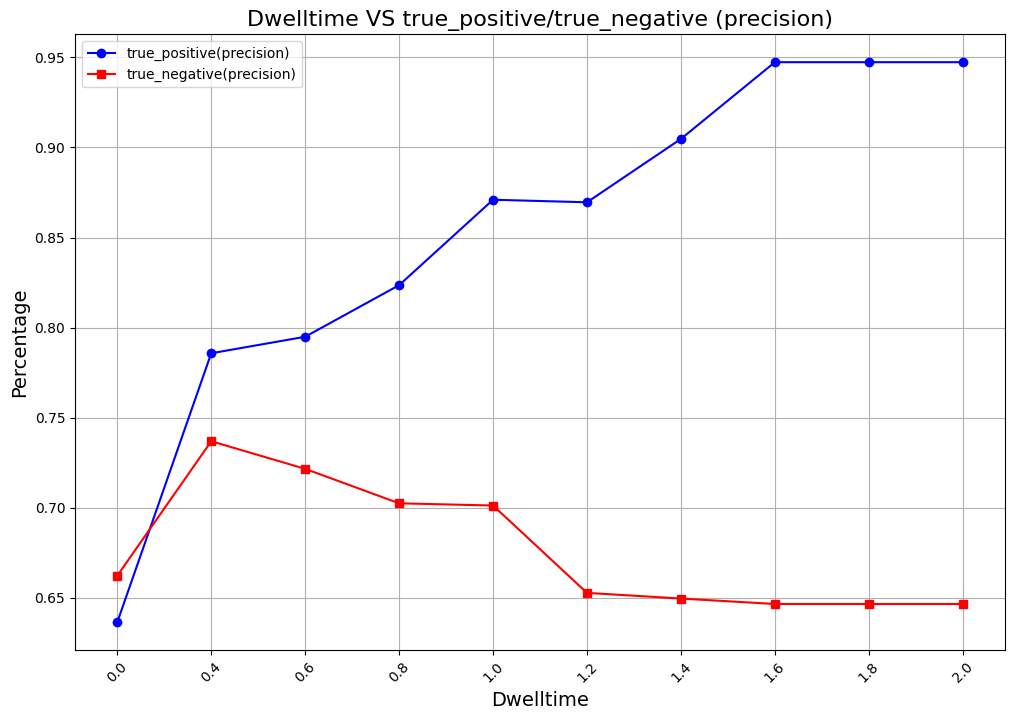

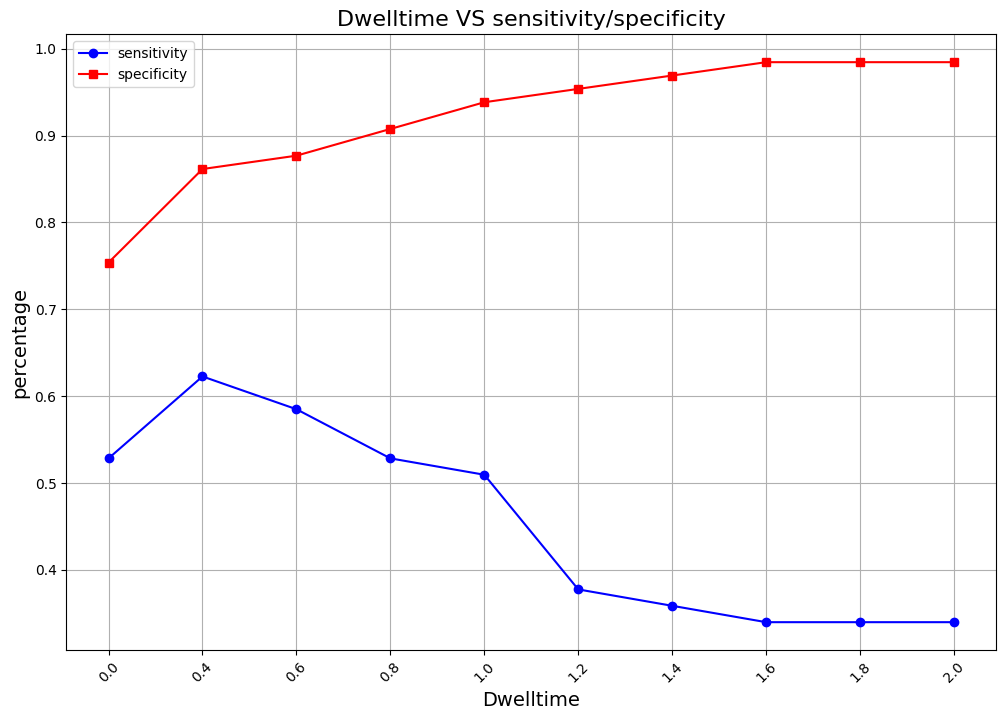

In [22]:
data_for_graph = {
    "Dwelltime":[],
    "count_true_positive":[],
    "count_false_positive":[],
    "count_true_negative":[],
    "count_false_negative":[],
    "sum_true_pos":[],
    "sum_false_pos":[],
    "sum_true_neg":[],
    "sum_false_neg":[]
}
for m in all_threshold:
    ignore_events_threshold = m
    data_for_graph["Dwelltime"].append(str(round(ignore_events_threshold,2)))
data_for_graph["count_true_positive"] = avg_true_pos
data_for_graph["count_false_positive"]= avg_false_pos
data_for_graph["count_true_negative"] = avg_true_neg
data_for_graph["count_false_negative"] = avg_false_neg
data_for_graph["sum_true_pos"] = sum_true_pos
data_for_graph["sum_false_pos"]= sum_false_pos
data_for_graph["sum_true_neg"] = sum_true_neg
data_for_graph["sum_false_neg"] = sum_false_neg
# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_positive"], marker='o', linestyle='-', color='b', label='true_positive(precision)')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_negative"], marker='s', linestyle='-', color='r', label='true_negative(precision)')

# Adding titles and labels
plt.title('Dwelltime VS true_positive/true_negative (precision)', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()

# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_positive"], marker='o', linestyle='-', color='b', label='sensitivity')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_negative"], marker='s', linestyle='-', color='r', label='specificity')

# Adding titles and labels
plt.title('Dwelltime VS sensitivity/specificity', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()

In [23]:
# print(len(channel_trigger))
# # Plotting the line chart
# plt.figure(figsize=(12, 8))
# plt.plot(channel_trigger[775936:785936], marker='s', linestyle='-', color='r', label='count_true_negative')

# # Adding titles and labels
# plt.title('Dwelltime VS count_true_positive/count_true_negative percentage', fontsize=16)
# plt.xlabel('Dwelltime', fontsize=14)
# plt.ylabel('Percentage', fontsize=14)
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)

# # Displaying the chart
# plt.show()

In [24]:
def convert_to_serializable(obj):
    if isinstance(obj, np.int64):
        return int(obj)
    raise TypeError("Type not serializable")

# Specify the file name
file_name = 'eeg_data_for_graph.json'

# Save the dictionary to a file
with open(file_name, 'w') as file:
    json.dump(data_for_graph, file, default=convert_to_serializable)
    
# Save the dictionary to a file
with open(graph_file, 'w') as file:
    json.dump(data_for_graph, file, default=convert_to_serializable)

In [25]:
data_for_graph

{'Dwelltime': ['0.0',
  '0.4',
  '0.6',
  '0.8',
  '1.0',
  '1.2',
  '1.4',
  '1.6',
  '1.8',
  '2.0'],
 'count_true_positive': [0.6363636363636364,
  0.7857142857142857,
  0.7948717948717948,
  0.8235294117647058,
  0.8709677419354839,
  0.8695652173913043,
  0.9047619047619048,
  0.9473684210526315,
  0.9473684210526315,
  0.9473684210526315],
 'count_false_positive': [0.5283018867924528,
  0.6226415094339622,
  0.5849056603773585,
  0.5283018867924528,
  0.5094339622641509,
  0.37735849056603776,
  0.3584905660377358,
  0.33962264150943394,
  0.33962264150943394,
  0.33962264150943394],
 'count_true_negative': [0.6621621621621622,
  0.7368421052631579,
  0.7215189873417721,
  0.7023809523809523,
  0.7011494252873564,
  0.6526315789473685,
  0.6494845360824743,
  0.6464646464646465,
  0.6464646464646465,
  0.6464646464646465],
 'count_false_negative': [0.7538461538461538,
  0.8615384615384616,
  0.8769230769230769,
  0.9076923076923077,
  0.9384615384615385,
  0.9538461538461539,
  0